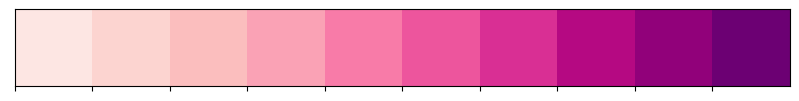

In [76]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression #분산 팽창계수 계산할때 사용
from sklearn.feature_selection import RFE #후진제거법(변수선택)
from sklearn.preprocessing import StandardScaler #표준화 회귀계수 산출(scale 변환)
from statsmodels.tools.eval_measures import rmse # 평가함수
from sklearn.metrics import r2_score
import matplotlib.font_manager as fm
import graphviz # 나무구조 시각화
from sklearn.ensemble import RandomForestRegressor #예측/회귀
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor # 예측/회귀 Decision Tree
from sklearn.model_selection import train_test_split # 데이터 분할 : train, test
from sklearn.model_selection import GridSearchCV #최적 모델, 파라미터 탐색
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
import warnings
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from scipy import stats
from random import random
from random import uniform
import math
import os
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')

# path='/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
# fontprop=fm.FontProperties(fname=path, size=18).get_name()
# matplotlib.rc('font',family = fontprop)
# matplotlib.rc('axes', unicode_minus = False)

my_palette = ['#'+hex for hex in "9b5de5 f15bb5 fee440 00bbf9 00f5d4".split(' ')]
my_palette = sns.set_palette(my_palette)
sns.color_palette()

sequential_colors = sns.color_palette("RdPu", 10)
sns.palplot(sequential_colors)

from sklearn.decomposition import PCA

import statsmodels.api as sm

In [77]:
## 윈도우 한글 폰트
import matplotlib.font_manager as fm
font_fname = font_fname = "c:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_fname, size=18).get_name()
matplotlib.rc('font',family= fontprop)
matplotlib.rc('axes',unicode_minus=False)

In [78]:
df_raw = pd.read_csv("C:/Users/LBG/Desktop/medical_v5.csv", encoding='euc-kr')
df_raw.head()

,환자ID,Instability,Large_Lymphocyte,Location_of_herniation,MF_ES,Modic_change,PI,PT,Seg_Angle_raw,Vaccum_disc,...,헤모글로빈수치,혈액형,혈액형_index,혈전합병증여부,환자통증정도,후방디스크높이mm,흡연여부,수술기법,수술_date,수술_date1
0,647PT,0,53.1,2,2504.09,0,37.3,2.9,22.5,0,...,14.74,RH+O,3,0,2,8.77,0,TELD,2021-06-30,Jun-21
1,8PT,0,43.8,4,1789.60,0,50.6,18.5,10.7,0,...,15.35,RH+B,2,0,7,8.60,1,TELD,2020-04-02,Apr-20
2,75PT,0,46.0,3,2016.60,0,34.7,6.0,24.1,0,...,11.19,RH+B,2,0,10,5.10,0,TELD,2020-07-19,Jul-20
3,83PT,0,33.0,2,1649.30,0,41.8,19.3,12.6,0,...,14.34,RH+B,2,0,8,8.80,0,TELD,2020-12-11,Dec-20
4,89PT,0,16.1,4,2463.20,0,41.1,22.9,6.7,0,...,11.70,RH+A,0,0,7,7.30,0,TELD,2021-07-19,Jul-21


In [79]:
df_raw['수술일자'] = df_raw['수술일자'].astype(str)
def date(x) :
    month = x[4:6]
    return month
df_raw['수술month'] = df_raw['수술일자'].apply(lambda x:date(x))

def season(x) :
    if ((x=='12')|(x=='01')|(x=='02')):
        return '겨울'
    if ((x=='03')|(x=='04')|(x=='05')):
        return '봄'
    if (x=='06')|(x=='07')|(x=='08'):
        return '여름'
    if (x=='09')|(x=='10')|(x=='11'):
        return '가을'
df_raw['계절'] = df_raw['수술month'].apply(lambda x:season(x))

In [80]:
df_raw.drop(['num'],axis=1,inplace=True)
df_raw = df_raw[df_raw['지방축적도']<6000]
df_raw = df_raw[df_raw['후방디스크높이mm']<90]
df_raw = df_raw[df_raw['PI']<500]
df_raw = df_raw[df_raw['Seg_Angle_raw']<160]

In [81]:
df_a = df_raw.groupby(['계절', '재발여부'], as_index=False).size()
df_pivot = df_a.pivot('계절', '재발여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:4.343
p:0.227
degree pf freedom: 3
expected value: 
[[373.454  50.546]
 [577.797  78.203]
 [397.235  53.765]
 [306.514  41.486]]


In [82]:
df_a = df_raw.groupby(['수술기법', '재발여부'], as_index=False).size()
df_pivot = df_a.pivot('수술기법', '재발여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:7.876
p:0.005
degree pf freedom: 1
expected value: 
[[ 125.953   17.047]
 [1529.047  206.953]]


In [83]:
df_a = df_raw.groupby(['Vaccum_disc', '재발여부'], as_index=False).size()
df_pivot = df_a.pivot('Vaccum_disc', '재발여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:1.323
p:0.250
degree pf freedom: 1
expected value: 
[[1560.756  211.244]
 [  94.244   12.756]]


In [84]:
df_a = df_raw.groupby(['간질성폐질환', '재발여부'], as_index=False).size()
df_pivot = df_a.pivot('간질성폐질환', '재발여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:0.993
p:0.319
degree pf freedom: 1
expected value: 
[[1621.53  219.47]
 [  33.47    4.53]]


In [85]:
df_a = df_raw.groupby(['고혈압여부', '재발여부'], as_index=False).size()
df_pivot = df_a.pivot('고혈압여부', '재발여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:9.317
p:0.002
degree pf freedom: 1
expected value: 
[[1440.088  194.912]
 [ 214.912   29.088]]


In [86]:
df_a = df_raw.groupby(['당뇨여부', '재발여부'], as_index=False).size()
df_pivot = df_a.pivot('당뇨여부', '재발여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:56.676
p:0.000
degree pf freedom: 1
expected value: 
[[1551.948  210.052]
 [ 103.052   13.948]]


In [87]:
df_a = df_raw.groupby(['과거수술횟수', '재발여부'], as_index=False).size()
df_pivot = df_a.pivot('과거수술횟수', '재발여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:4.654
p:0.199
degree pf freedom: 3
expected value: 
[[1.30885e+03 1.77150e+02]
 [1.98177e+02 2.68230e+01]
 [1.40926e+02 1.90740e+01]
 [7.04600e+00 9.54000e-01]]


In [88]:
df_a = df_raw.groupby(['말초동맥질환여부', '재발여부'], as_index=False).size()
df_pivot = df_a.pivot('말초동맥질환여부', '재발여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:0.357
p:0.550
degree pf freedom: 1
expected value: 
[[1.647954e+03 2.230460e+02]
 [7.046000e+00 9.540000e-01]]


In [89]:
df_a = df_raw.groupby(['성별', '재발여부'], as_index=False).size()
df_pivot = df_a.pivot('성별', '재발여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:4.694
p:0.030
degree pf freedom: 1
expected value: 
[[1017.31  137.69]
 [ 637.69   86.31]]


In [90]:
df_a = df_raw.groupby(['심혈관질환', '재발여부'], as_index=False).size()
df_pivot = df_a.pivot('심혈관질환', '재발여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:4.227
p:0.040
degree pf freedom: 1
expected value: 
[[1595.106  215.894]
 [  59.894    8.106]]


In [91]:
df_a = df_raw.groupby(['우울증여부', '재발여부'], as_index=False).size()
df_pivot = df_a.pivot('우울증여부', '재발여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:2.580
p:0.108
degree pf freedom: 1
expected value: 
[[1617.126  218.874]
 [  37.874    5.126]]


In [92]:
df_a = df_raw.groupby(['혈전합병증여부', '재발여부'], as_index=False).size()
df_pivot = df_a.pivot('혈전합병증여부', '재발여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:2.498
p:0.114
degree pf freedom: 1
expected value: 
[[1.651477e+03 2.235230e+02]
 [3.523000e+00 4.770000e-01]]


In [93]:
df_a = df_raw.groupby(['흡연여부', '재발여부'], as_index=False).size()
df_pivot = df_a.pivot('흡연여부', '재발여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:61.844
p:0.000
degree pf freedom: 1
expected value: 
[[1293.877  175.123]
 [ 361.123   48.877]]


In [94]:
df_a = df_raw.groupby(['Location_of_herniation', '재발여부'], as_index=False).size()
df_pivot = df_a.pivot('Location_of_herniation', '재발여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:6.208
p:0.184
degree pf freedom: 4
expected value: 
[[432.467  58.533]
 [493.241  66.759]
 [572.512  77.488]
 [126.833  17.167]
 [ 29.947   4.053]]


In [95]:
df_a = df_raw.groupby(['Modic_change', '재발여부'], as_index=False).size()
df_pivot = df_a.pivot('Modic_change', '재발여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:2.646
p:0.450
degree pf freedom: 3
expected value: 
[[1433.922  194.078]
 [  51.086    6.914]
 [ 150.615   20.385]
 [  19.377    2.623]]


In [96]:
df_a = df_raw.groupby(['혈액형', '재발여부'], as_index=False).size()
df_pivot = df_a.pivot('혈액형', '재발여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:6.169
p:0.104
degree pf freedom: 3
expected value: 
[[598.936  81.064]
 [174.396  23.604]
 [418.374  56.626]
 [463.294  62.706]]


In [97]:
df_a = df_raw.groupby(['Location_of_herniation', '수술실패여부'], as_index=False).size()
df_pivot = df_a.pivot('Location_of_herniation', '수술실패여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:9.627
p:0.047
degree pf freedom: 4
expected value: 
[[461.472  29.528]
 [526.323  33.677]
 [610.91   39.09 ]
 [135.34    8.66 ]
 [ 31.955   2.045]]


In [98]:
df_a = df_raw.groupby(['고혈압여부', '수술실패여부'], as_index=False).size()
df_pivot = df_a.pivot('고혈압여부', '수술실패여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:0.278
p:0.598
degree pf freedom: 1
expected value: 
[[1536.674   98.326]
 [ 229.326   14.674]]


In [99]:
df_a = df_raw.groupby(['과거수술횟수', '수술실패여부'], as_index=False).size()
df_pivot = df_a.pivot('과거수술횟수', '수술실패여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:7.980
p:0.046
degree pf freedom: 3
expected value: 
[[1.396634e+03 8.936600e+01]
 [2.114690e+02 1.353100e+01]
 [1.503780e+02 9.622000e+00]
 [7.519000e+00 4.810000e-01]]


In [100]:
df_a = df_raw.groupby(['당뇨여부', '수술실패여부'], as_index=False).size()
df_pivot = df_a.pivot('당뇨여부', '수술실패여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:1.935
p:0.164
degree pf freedom: 1
expected value: 
[[1656.036  105.964]
 [ 109.964    7.036]]


In [101]:
df_a = df_raw.groupby(['빈혈여부', '수술실패여부'], as_index=False).size()
df_pivot = df_a.pivot('빈혈여부', '수술실패여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:2.946
p:0.086
degree pf freedom: 1
expected value: 
[[1722.766  110.234]
 [  43.234    2.766]]


In [102]:
df_a = df_raw.groupby(['성별', '수술실패여부'], as_index=False).size()
df_pivot = df_a.pivot('성별', '수술실패여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:3.249
p:0.071
degree pf freedom: 1
expected value: 
[[1085.54   69.46]
 [ 680.46   43.54]]


In [103]:
df_a = df_raw.groupby(['스테로이드치료', '수술실패여부'], as_index=False).size()
df_pivot = df_a.pivot('스테로이드치료', '수술실패여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:2.528
p:0.112
degree pf freedom: 1
expected value: 
[[ 710.535   45.465]
 [1055.465   67.535]]


In [104]:
df_a = df_raw.groupby(['신부전여부', '수술실패여부'], as_index=False).size()
df_pivot = df_a.pivot('신부전여부', '수술실패여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:0.057
p:0.812
degree pf freedom: 1
expected value: 
[[1720.887  110.113]
 [  45.113    2.887]]


In [105]:
df_a = df_raw.groupby(['흡연여부', '수술실패여부'], as_index=False).size()
df_pivot = df_a.pivot('흡연여부', '수술실패여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:5.348
p:0.021
degree pf freedom: 1
expected value: 
[[1380.657   88.343]
 [ 385.343   24.657]]


In [106]:
df_a = df_raw.groupby(['수술기법', '수술실패여부'], as_index=False).size()
df_pivot = df_a.pivot('수술기법', '수술실패여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:0.109
p:0.742
degree pf freedom: 1
expected value: 
[[ 134.4    8.6]
 [1631.6  104.4]]


In [107]:
df_a = df_raw.groupby(['혈액형', '수술실패여부'], as_index=False).size()
df_pivot = df_a.pivot('혈액형', '수술실패여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:2.325
p:0.508
degree pf freedom: 3
expected value: 
[[639.106  40.894]
 [186.093  11.907]
 [446.434  28.566]
 [494.367  31.633]]


In [108]:
df_a = df_raw.groupby(['Modic_change', '수술실패여부'], as_index=False).size()
df_pivot = df_a.pivot('Modic_change', '수술실패여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.4f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:7.804
p:0.0503
degree pf freedom: 3
expected value: 
[[1.530095e+03 9.790500e+01]
 [5.451200e+01 3.488000e+00]
 [1.607160e+02 1.028400e+01]
 [2.067700e+01 1.323000e+00]]


In [109]:
df_a = df_raw.groupby(['Vaccum_disc', '수술실패여부'], as_index=False).size()
df_pivot = df_a.pivot('Vaccum_disc', '수술실패여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:0.199
p:0.656
degree pf freedom: 1
expected value: 
[[1665.435  106.565]
 [ 100.565    6.435]]


In [110]:
df_a = df_raw.groupby(['척추이동척도', '수술실패여부'], as_index=False).size()
df_pivot = df_a.pivot('척추이동척도', '수술실패여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:16.805
p:0.002
degree pf freedom: 4
expected value: 
[[4.793290e+02 3.067100e+01]
 [3.759400e+01 2.406000e+00]
 [1.503800e+01 9.620000e-01]
 [1.172947e+03 7.505300e+01]
 [6.109100e+01 3.909000e+00]]


In [111]:
df_a = df_raw.groupby(['척추전방위증', '수술실패여부'], as_index=False).size()
df_pivot = df_a.pivot('척추전방위증', '수술실패여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:1.410
p:0.235
degree pf freedom: 1
expected value: 
[[1708.668  109.332]
 [  57.332    3.668]]


In [112]:
df_a = df_raw.groupby(['계절', '수술실패여부'], as_index=False).size()
df_pivot = df_a.pivot('계절', '수술실패여부')
df_pivot

chi, pval, dof, expected = stats.chi2_contingency(df_pivot)

print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:1.713
p:0.634
degree pf freedom: 3
expected value: 
[[398.501  25.499]
 [616.549  39.451]
 [423.878  27.122]
 [327.072  20.928]]
